In [2]:
import mylibrary as mylib
import numpy as np
import matplotlib.pyplot as plt
import math as m
import cv2
from sklearn.cluster import DBSCAN

In [18]:
base_dir_z = "H:\PERSONAL\PROJECTS\Programming\Bacteria_tracing-py\encapsulation_04001_Series004_z"
images_namelist = [f"{base_dir_z}\encapsulation_04001_Series004_z{i:03d}.tif" for i in range(0, 198)]

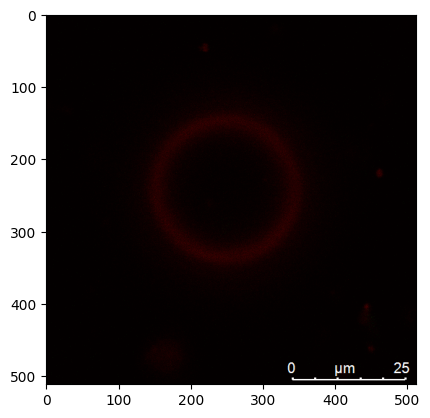

In [19]:
image = np.array(cv2.imread(images_namelist[0]))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [20]:
for i in range(5):
    image = cv2.imread(images_namelist[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    red_layer = image[:, :, 0]
    # plt.imshow(red_layer)

    thresholded = cv2.adaptiveThreshold(red_layer, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, -5)
    thresholded = cv2.threshold(red_layer, 30, 255, cv2.THRESH_BINARY)[1]
    # thresholded = np.copy(red_layer)

    circles = cv2.HoughCircles(thresholded, cv2.HOUGH_GRADIENT, dp=1, minDist=1000, param1=3, param2=3, minRadius=75, maxRadius=200)

    # Step 5: Draw the circular contours on the original image
    if circles is not None:
        print("Number of circular objects detected:", len(circles[0]))
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            center = (circle[0], circle[1])
            radius = circle[2]
            cv2.circle(thresholded, center, radius, (200, 200, 200), 2,)

    # Display the result
    cv2.imshow("Circular Red Ring Detection", thresholded)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Number of circular objects detected: 1


Number of circular objects detected: 1
Number of circular objects detected: 1
Number of circular objects detected: 1
Number of circular objects detected: 1


In [96]:
print(circles)

[[[248 240 104]]]
